## ****Description****
##### This is the code used to make the a Pandas dataframe that contains two columns:
###### "FolderName": Names of the folder where each array 
###### "ImageData": 2D arrays of each image(was originally jpeg)
 

In [1]:
# All Necessry Packages
import os
import pandas as pd
from PIL import Image  # Make sure you have the PIL/Pillow library installed
import numpy as np
import matplotlib.pyplot as plt
# Packages used for testing
import time

In [2]:
### List of the Folder
###(Includes: 'Achaemenid architecture','American craftsman style', 'American Foursquare architecture', 'Ancient Egyptian architecture', 'Art Deco architecture')
folder_paths = ['Achaemenid architecture','American craftsman style', 'American Foursquare architecture', 'Ancient Egyptian architecture', 'Art Deco architecture']

#### The initalization of dataframe takes around 100 Seconds

hmm, something tells me that I don't have the ram to store this table in memory because 1000x1000x3 RBG pictures is like 3 MB of data and storing 4180 of them from our test images is about 12 GB of data which is too much for my poor ram.

Time to see how pandas dataframes save on memory.
Oh, it doesn't, the dataframe is still a 3GB monster in ram before I upscale most of the pictures. Looks like I get to make all the images 500x500x3 to not increase ram use to the point I bluescreen again. This will be a pain to optimise for the final model with the entire dataset.

In [3]:
start = time.time()
data = []

for folder in folder_paths:
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.lower().endswith('.jpg'):
                folder_name = os.path.basename(root)
                file_path = os.path.join(root, file)

                # Open the image and convert it to a NumPy array
                with Image.open(file_path) as img:
                    img_array = np.array(img)

                data.append((folder_name, img_array))

df = pd.DataFrame(data, columns=['FolderName', 'ImageData'])
end = time.time()

In [4]:
print(end - start)

16.0592999458313


In [5]:
df.size

4180

In [6]:
df['ImageData'][0]
array_2d = np.array(df['ImageData'][0])

# Check the shape of the 2D array
shape_of_array = array_2d.shape
print(shape_of_array)

(442, 1000, 3)


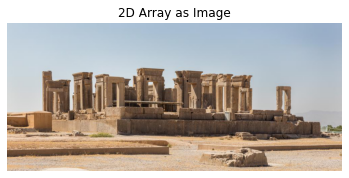

In [7]:
# Display the 2D array as an image
plt.imshow(df['ImageData'][0], cmap='gray')  # 'gray' colormap for grayscale images
plt.title('2D Array as Image')
plt.axis('off')  # Hide the axis
plt.show()

To be able to export the table uncomment and run following:

In [8]:
start = time.time()
csv_filename = 'trial.csv'
df.to_csv(csv_filename, index=False)
end = time.time()
print(end - start, '\n')

0.8267879486083984 



In [9]:
shapes=[]
for i in df.iloc[:,1]:
    shapes.append(i.shape)

In [10]:
max0=0
max1=0
for i in shapes:
    if i[0]>max0:
        max0=i[0]
    if i[1]>max1:
        max1=i[1]

In [11]:
print(max0,max1)

1000 1000


(413, 610, 3)


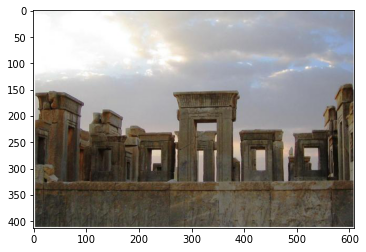

In [12]:
test=np.array(df.iloc[2,1])
print(test.shape)
plt.imshow(test)

In [13]:
def resize1(test):
    start=time.time()
    resizer=np.zeros((1000,1000,3),dtype=np.uint8)
    a=test.shape[0]
    b=test.shape[1]
    resizer[:a,:b,:]=test
    end=time.time()
    print(end-start)
    return resizer

In [34]:
def ind (x,i,j,a,b,w):
    return x[int(i*a):int((i+1)*a),int(j*b):int((j+1)*b),w]
def resizerblackbars(test):
    start=time.time()
    a=test.shape[0]/50
    b=test.shape[1]/50
    resizer=np.zeros((50,50,3),dtype=np.uint8)
    i=0
    while i < 50:
        j=0
        while j < 50:
            resizer[i,j,:]=[np.mean(ind(test,i,j,a,b,0)),np.mean(ind(test,i,j,a,b,1)),np.mean(ind(test,i,j,a,b,2))]
            j+=1
        i += 1
    end=time.time()
    print(end-start)
    return resizer

0.0010194778442382812


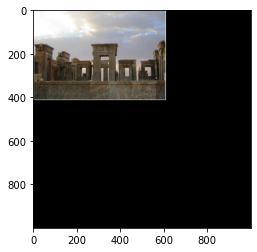

In [35]:
test2=resize1(test)
plt.imshow(test2)

0.06045699119567871


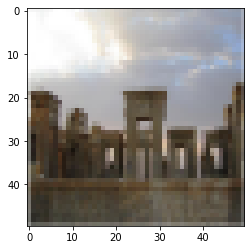

In [38]:
test2=resizerblackbars(test)
plt.imshow(test2)

In [39]:
def shrink_img(df,image):
    """
    Image should be an int for the image number to grab, 0 based indexing
    """
    img=df.iloc[image,1]
    output = resizerblackbars(img)
    return output

0.06318306922912598


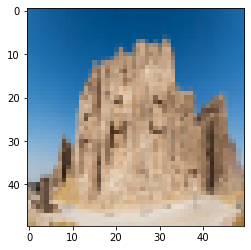

In [40]:
test4=shrink_img(df,4)
plt.imshow(test4)

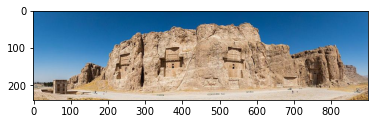

In [42]:
plt.imshow(df.iloc[4,1])

In [43]:
0.06*4180

250.79999999999998

In [44]:
# determining shapes count
shapes={}
for i in range(0,len(df)):
    if df.iloc[i,1].shape not in shapes:
        shapes[df.iloc[i,1].shape]=1
    else:
        shapes[df.iloc[i,1].shape] += 1

In [51]:
k=0
dims=0
for i in shapes:
    if shapes[i] > k:
        k=shapes[i]
        dims=i
print(dims, k)

(600, 800, 3) 365


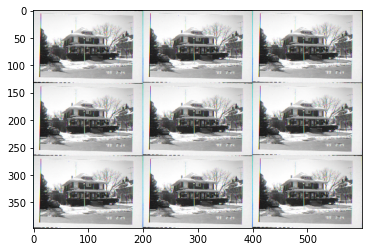

In [61]:
#absolute shitter attempt 1 at making this black and white image rbg and good enough
if df.iloc[948,1].shape != (397,600,3):
    df.iloc[948,1]=np.array([df.iloc[948,1],df.iloc[948,1],df.iloc[948,1]])
    df.iloc[948,1]=df.iloc[948,1].reshape(397,600,3)
plt.imshow(df.iloc[948,1])

In [3]:
np.zeros?

In [8]:
test3=np.zeros((1000,1000,3),dtype=np.int8)
3000000*4180/(1e9)

12.54

In [9]:
len(bytes(df))

NameError: name 'df' is not defined

In [62]:
start=time.time()
for i in range(0,len(df)):
    if df.iloc[i,1].shape != (1000,1000,3):
        df.iloc[i,1]=resizerblackbars(df.iloc[i,1])
end=time.time()
print(end-start)

MemoryError: Unable to allocate 11.4 MiB for an array with shape (1000, 1000, 3) and data type int32

In [40]:
df.iloc[948,1].shape

(397, 600)

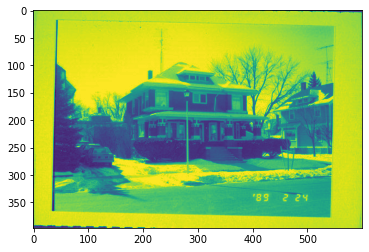

In [38]:
plt.imshow(df.iloc[948,1])

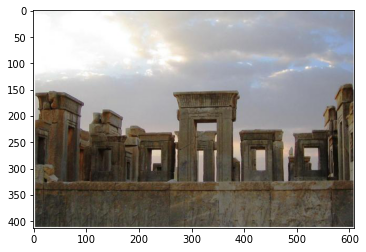

In [34]:
plt.imshow(df.iloc[2,1])

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

AttributeError: module 'numpy' has no attribute 'typeDict'

In [22]:
df_1D = .ravel()

data = np.zeros((0, 2))

SyntaxError: invalid syntax (<ipython-input-22-98794d15d323>, line 1)